In [1]:
pip install geopandas shapely gpxpy


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from datetime import datetime

# Generiere den Zeitstempel im Format "YYYY-MM-DD_HH-MM-SS"
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

gpx_directory = '../data/gpx'
output_geojson_path = f"../data/export/{timestamp}.geojson"

In [9]:
import os
import glob
import logging
import gpxpy
from shapely.geometry import LineString
import geopandas as gpd

def import_track_and_save_geojson(gpx_directory, output_geojson_path):
    """
    Liest alle GPX-Dateien aus dem übergebenen Verzeichnis ein, extrahiert Tracks
    und speichert sie als GeoDataFrame. Anschließend wird das GeoDataFrame als
    GeoJSON-Datei gespeichert und zurückgegeben.
    """
    gpx_files = glob.glob(os.path.join(gpx_directory, "*.GPX"))
    data = []

    for file_path in gpx_files:
        gpx_file_name = os.path.basename(file_path)

        with open(file_path, 'r') as file:
            try:
                gpx = gpxpy.parse(file)
                for track in gpx.tracks:
                    for segment in track.segments:
                        # Punkte (Longitude, Latitude) extrahieren
                        points = [(p.longitude, p.latitude) for p in segment.points]
                        linestring = LineString(points)
                        data.append({
                            'gpx_file': gpx_file_name,
                            'name': track.name,
                            'geom': linestring,
                            'date': gpx.time  # kann None sein, wenn nicht vorhanden
                        })
            except Exception as e:
                logging.error(f"Fehler beim Parsen der GPX-Datei {file_path}: {e}")

    # Wenn data leer ist, Warnung ausgeben und leeres GeoDataFrame zurückgeben
    if not data:
        logging.warning("Keine Daten aus den GPX-Dateien extrahiert.")
        return gpd.GeoDataFrame(columns=['gpx_file','name','geom','date'], crs='EPSG:4326')

    # Andernfalls das GeoDataFrame ganz normal erstellen
    track_data = gpd.GeoDataFrame(data, geometry='geom', crs='EPSG:4326')

    # Hier solltest du unbedingt einen DateiNamen angeben, z.B. 'tracks.geojson'
    track_data.to_file(output_geojson_path, driver='GeoJSON')

    return track_data

track_data = import_track_and_save_geojson(gpx_directory, output_geojson_path)
track_data

,gpx_file,name,geom,date
0,Clemens_Espunkt_2025-01-07_08-06-40.GPX,None,"LINESTRING (11.96106 51.48437, 11.96106 51.484...",2025-01-12 16:27:31.882000+00:00
1,Clemens_Espunkt_2025-01-22_08-39-49.GPX,None,"LINESTRING (11.96094 51.48434, 11.96094 51.484...",2025-01-26 15:45:33.497000+00:00
2,Clemens_Espunkt_2025-03-03_08-50-11.GPX,None,"LINESTRING (11.96089 51.48492, 11.96086 51.484...",2025-04-07 04:35:56.426000+00:00
3,Clemens_Espunkt_2025-04-21_11-10-24.GPX,None,"LINESTRING (12.05451 51.48108, 12.05452 51.481...",2025-04-30 08:32:08.274000+00:00
4,Clemens_Espunkt_2025-01-27_08-21-20.GPX,None,"LINESTRING (11.96125 51.48453, 11.96122 51.484...",2025-02-10 10:16:14.030000+00:00
5,Clemens_Espunkt_2025-04-21_15-51-38.GPX,None,"LINESTRING (12.05478 51.48096, 12.05479 51.480...",2025-04-30 08:32:57.267000+00:00
6,Clemens_Espunkt_2025-03-21_13-37-23.GPX,None,"LINESTRING (11.96138 51.48478, 11.96143 51.484...",2025-04-07 04:40:21.947000+00:00
7,Clemens_Espunkt_2025-01-10_08-23-08.GPX,None,"LINESTRING (11.96125 51.48452, 11.96122 51.484...",2025-01-12 16:25:49.879000+00:00
8,Clemens_Espunkt_2025-02-11_09-02-18.GPX,None,"LINESTRING (11.96081 51.48665, 11.96081 51.486...",2025-02-13 18:12:26.126000+00:00
9,Clemens_Espunkt_2025-03-14_08-37-57.GPX,None,"LINESTRING (11.96085 51.48461, 11.96091 51.484...",2025-04-07 04:39:08.391000+00:00


(11.9011, 51.43438663061589, 12.07322, 51.52879333)


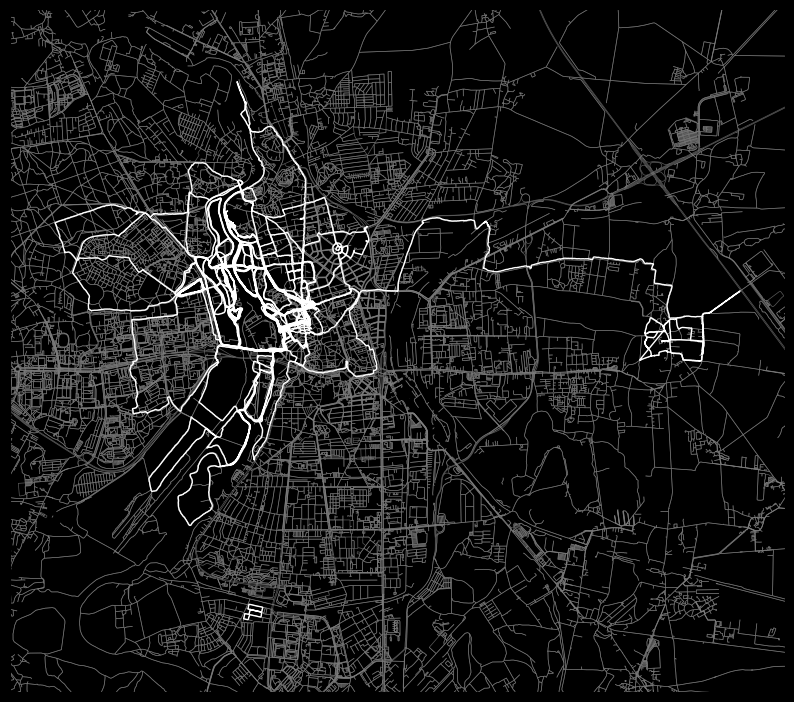

Bild gespeichert als: ../data/export/02_multiple_tracks_2025-04-30_10-44-43.png


In [10]:
import geopandas as gdp
import matplotlib.pyplot as plt
import osmnx as ox
from datetime import datetime

output_directory = "../data/export/"
output_filename = os.path.join(output_directory, f"02_multiple_tracks_{timestamp}.png")

# Berechnung der Bounding Box
bbox_total = track_data.total_bounds  # [min_x, min_y, max_x, max_y]

# Umbenennen der Koordinaten in north, south, east, west
north = bbox_total[3]
south = bbox_total[1]
east = bbox_total[2]
west = bbox_total[0]

padding = 0.01  # Kleiner Puffer um den Track
north += padding
south -= padding
east += padding
west -= padding

# Bounding-Box im gewünschten Format speichern
bbox = (west, south, east, north)  # (left, bottom, right, top)


# Bounding Box anzeigen (min_x, min_y, max_x, max_y)
print(bbox)

# Herunterladen des Straßennetzes mit osmnx
G = ox.graph_from_bbox(
    bbox=bbox,
    network_type="all",
    simplify=True,
    retain_all=True,
    truncate_by_edge=True,
)

# Kanten des Netzwerks extrahieren
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# Visualisierung mit matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

# Straßennetz als Hintergrund zeichnen
edges.plot(ax=ax, linewidth=0.5, color="gray", alpha=0.7, zorder=1)
track_data.plot(ax=ax, linewidth=1, color="white", alpha=1, zorder=2)  # Plotten des GeoDataFrames auf der Achse

# Hintergrund schwarz setzen
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# Achsen entfernen
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([west, east])
ax.set_ylim([south, north])

# Plot anzeigen
plt.show()

# Generiere den Zeitstempel im Format "YYYY-MM-DD_HH-MM-SS"
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Speichern der Grafik mit dem neuen Dateinamen
fig.savefig(output_filename, dpi=1080, bbox_inches="tight", facecolor="black")
print(f"Bild gespeichert als: {output_filename}")

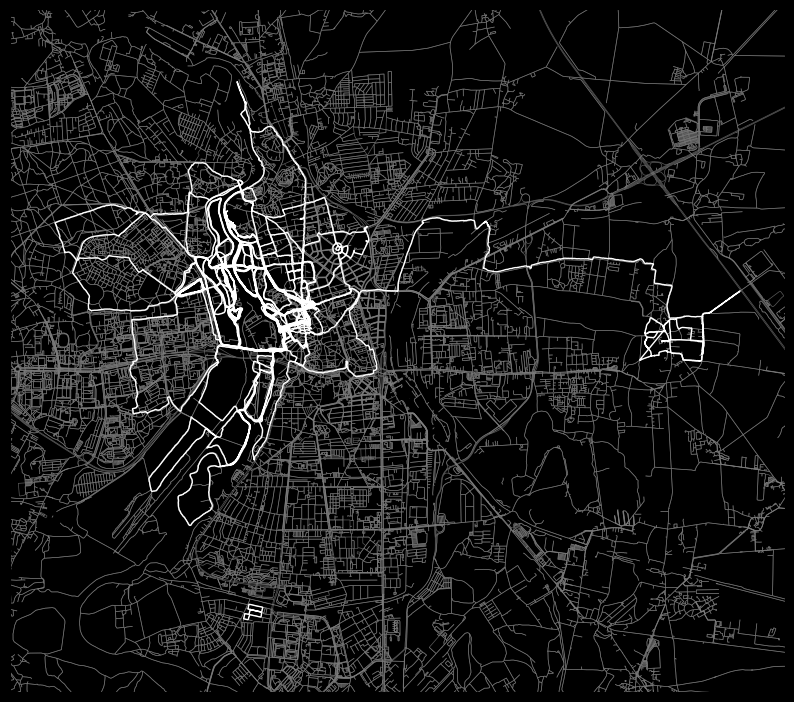

Bild gespeichert als: ../data/export/02_multiple_tracks_2025-04-30_10-50-36.png


In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
from datetime import datetime

def plot_track(track_data):
    # 1) Bounding Box berechnen und anpassen
    bbox_total = track_data.total_bounds  # [min_x, min_y, max_x, max_y]

    north = bbox_total[3]
    south = bbox_total[1]
    east = bbox_total[2]
    west = bbox_total[0]

    padding = 0.01  # Kleiner Puffer
    north += padding
    south -= padding
    east += padding
    west -= padding

    # Wie du sagst: (west, south, east, north)
    bbox = (west, south, east, north)

    # 2) Herunterladen des Straßennetzes über OSMnx
    #    Wir verwenden die bbox so, wie du sie definiert hast.
    G = ox.graph_from_bbox(
        bbox=bbox,
        network_type="all",
        simplify=True,
        retain_all=True,
        truncate_by_edge=True,
    )

    # 3) Kanten (Edges) extrahieren
    edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

    # 4) Plotten
    fig, ax = plt.subplots(figsize=(10, 10))
    edges.plot(ax=ax, linewidth=0.5, color="gray", alpha=0.7, zorder=1)
    track_data.plot(ax=ax, linewidth=1, color="white", alpha=1, zorder=2)

    # Hintergrund und Achsen-Layout
    ax.set_facecolor("black")
    fig.patch.set_facecolor("black")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([west, east])
    ax.set_ylim([south, north])

    # Plot anzeigen
    plt.show()

    # 5) Mit Zeitstempel als PNG speichern
    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    os.makedirs(output_dir, exist_ok=True)
    output_filename = os.path.join(
        output_dir,
        f"02_multiple_tracks_{timestamp}.png"
    )
    fig.savefig(output_filename, dpi=1080, bbox_inches="tight", facecolor="black")
    print(f"Bild gespeichert als: {output_filename}")

# Beispiel-Aufruf, wenn du track_data schon hast:
output_dir = "../data/export/"
plot_track(track_data)


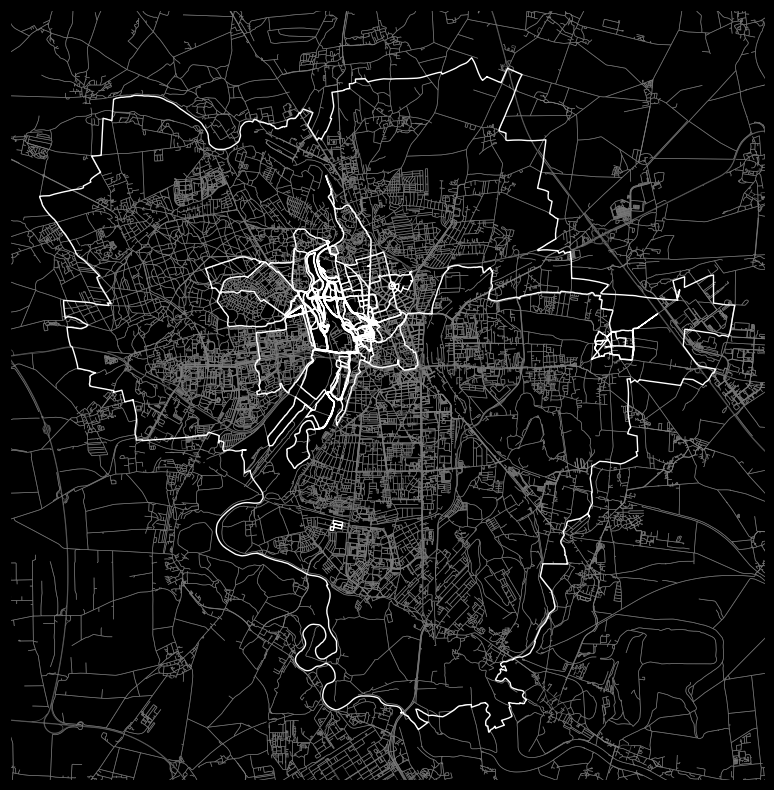

Bild gespeichert als: ../data/export/02_multiple_tracks_boundary_2025-04-30_10-52-23.png


In [12]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
from datetime import datetime

def plot_track(
    track_data,
    bounding_gdf=None,
    network_type="all",
    output_dir="../data/export/"
):
    """
    Visualisiert einen Track (track_data) zusammen mit dem passenden OSM-Straßennetz.

    Parameter
    ---------
    track_data : GeoDataFrame
        Das GeoDataFrame, das die zu zeichnenden Tracks enthält.
    bounding_gdf : GeoDataFrame, optional
        Wenn gesetzt, wird die Bounding Box anhand dieses GDF berechnet,
        statt von track_data. So kannst du unabhängig vom Track
        einen Kartenausschnitt definieren (z.B. einen Stadtteil).
        Standard: None -> Bounding Box von track_data.
    network_type : str, optional
        Steuert, welche Art von Wegen OSMnx aus OSM laden soll.
        Beispiele:
          - 'drive': Nur Straßen, auf denen man fahren kann
          - 'walk': Fußgänger-Routing
          - 'bike': Fahrrad-Routing
          - 'all': Alle Wege (Standard)
        Siehe auch OSMnx-Dokumentation.
    output_dir : str, optional
        Pfad zum Verzeichnis, in das der Plot als PNG gespeichert werden soll.
        Standard: "../data/export/"
    """

    # 1) Wähle das GDF, das für die Bounding Box verwendet werden soll
    if bounding_gdf is not None:
        use_gdf = bounding_gdf
    else:
        use_gdf = track_data

    # 2) Bounding Box berechnen (minx, miny, maxx, maxy) => (west, south, east, north)
    bbox_total = use_gdf.total_bounds

    north = bbox_total[3]
    south = bbox_total[1]
    east = bbox_total[2]
    west = bbox_total[0]

    # Optionaler Puffer für die Bounding Box
    padding = 0.01
    north += padding
    south -= padding
    east += padding
    west -= padding

    # Unser BBox-Tuple lautet (west, south, east, north)
    bbox = (west, south, east, north)

    # 3) OSMnx-Straßennetz herunterladen
    #    Hier kannst du über network_type steuern, ob du 'all', 'drive', 'walk' oder 'bike' etc. möchtest.
    G = ox.graph_from_bbox(
        bbox=bbox,
        network_type=network_type,
        simplify=True,
        retain_all=True,
        truncate_by_edge=True,
    )

    # 4) Kanten (Edges) extrahieren und als GeoDataFrame
    edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

    # 5) Plotten
    fig, ax = plt.subplots(figsize=(10, 10))
    # Straßennetz
    edges.plot(ax=ax, linewidth=0.5, color="gray", alpha=0.7, zorder=1)
    # Track-Daten
    track_data.plot(ax=ax, linewidth=1, color="white", alpha=1, zorder=2)
    use_gdf.plot(ax=ax, linewidth=1, color="white", alpha=1, zorder=2)

    # Hintergrund und Achsen-Layout
    ax.set_facecolor("black")
    fig.patch.set_facecolor("black")
    ax.set_xticks([])
    ax.set_yticks([])

    # xlim, ylim entsprechend unserer (west, east, south, north)
    ax.set_xlim([west, east])
    ax.set_ylim([south, north])

    # Plot anzeigen (optional, kann auch weggelassen werden, wenn du nur speichern willst)
    plt.show()

    # 6) PNG mit Zeitstempel speichern
    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    os.makedirs(output_dir, exist_ok=True)
    output_filename = os.path.join(output_dir, f"02_multiple_tracks_boundary_{timestamp}.png")
    fig.savefig(output_filename, dpi=1080, bbox_inches="tight", facecolor="black")
    print(f"Bild gespeichert als: {output_filename}")

#plot_track(track_data)
#plot_track(track_data, bounding_gdf=city_district_gdf)
#plot_track(track_data, network_type="drive")


# Beispiel: GeoDataFrame für den Stadtteil "Halle (Saale)" laden
city_district_halle = gpd.read_file("../data/plot_data/halle.geojson")

# Dann den Aufruf:
plot_track(
    track_data,                # Dein Track-GeoDataFrame
    bounding_gdf=city_district_halle,  # Begrenzung durch den Stadtteil
    network_type="all"         # Beliebig anpassbar: "all", "drive", "walk", "bike" ...
)


In [41]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
from datetime import datetime

def create_time_lapse(
    track_data,
    bounding_gdf=None,
    network_type="all",
    output_dir="/Users/clemensschenke/GIS/polar_viz/export_pics",
    padding=0.01
):
    """
    Erzeugt eine Reihe von Bildern (Time-Lapse), bei denen immer mehr Tracks
    hinzugefügt werden.

    1) Die Bounding Box wird genau einmal aus dem gesamten track_data (oder optional bounding_gdf) bestimmt.
    2) Das OSM-Straßennetz wird genau einmal heruntergeladen.
    3) Anschließend wird in einer Schleife je Track ein PNG erzeugt:
       - Bild 1: nur der erste Track
       - Bild 2: der erste + der zweite Track
       - ...
       - Bild N: alle Tracks

    Parameter
    ---------
    track_data : GeoDataFrame
        Enthält alle Tracks als LineString-Geometrien. Muss eine 'date'-Spalte
        oder eine andere Reihenfolge haben, nach der sortiert werden kann.
    bounding_gdf : GeoDataFrame, optional
        Falls gesetzt, wird die Bounding Box hierfür berechnet statt für track_data.
        So lässt sich die Ausdehnung eines beliebigen Gebiets fixieren.
    network_type : str, optional
        Siehe OSMnx-Doku; typischerweise 'all', 'drive', 'walk', 'bike' etc.
    output_dir : str, optional
        Wohin die generierten PNG-Bilder gespeichert werden.
    padding : float, optional
        Wie viel 'Puffer' zusätzlich um die Bounding Box gelegt wird.
    """

    # ---------------------------------------------
    # 1) Daten ggf. sortieren nach Datum (oder Name)
    # ---------------------------------------------
    # Beispiel: nach 'date' aufsteigend
    track_data_sorted = track_data.sort_values(by='date').reset_index(drop=True)

    # -----------------------------
    # 2) Bounding Box bestimmen
    # -----------------------------
    if bounding_gdf is not None:
        use_gdf = bounding_gdf
    else:
        use_gdf = track_data

    # total_bounds => [minx, miny, maxx, maxy]
    bbox_total = use_gdf.total_bounds
    north = bbox_total[3]
    south = bbox_total[1]
    east  = bbox_total[2]
    west  = bbox_total[0]

    # Kleiner Puffer
    padding = 0.01
    north += padding
    south -= padding
    east  += padding
    west  -= padding

    # (west, south, east, north)
    bbox = (west, south, east, north)

    # ---------------------------------------------
    # 3) OSMnx-Straßennetz nur 1x laden
    # ---------------------------------------------
    # Hinweis: OSMnx erwartet (north, south, east, west)
    G = ox.graph_from_bbox(
        bbox=bbox,
        network_type=network_type,
        simplify=True,
        retain_all=True,
        truncate_by_edge=True
    )
    
    
    edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

    # Verzeichnis anlegen, falls nicht vorhanden
    os.makedirs(output_dir, exist_ok=True)

    # ---------------------------------------------
    # 4) Schleife: Schrittweises Erzeugen der Bilder
    # ---------------------------------------------
    n_tracks = len(track_data_sorted)
    for i in range(1, n_tracks + 1):
        # track_data_subset = alle Tracks bis zum i-ten (inklusiv)
        track_data_subset = track_data_sorted.iloc[:i]

        # Plot erstellen (Hintergrund + Teilmenge der Tracks)
        fig, ax = plt.subplots(figsize=(10, 10))

        # Straßennetz
        edges.plot(ax=ax, linewidth=0.5, color="gray", alpha=0.7, zorder=1)
        # Inkrementelle Tracks
        track_data_subset.plot(ax=ax, linewidth=1, color="white", alpha=1, zorder=2)

        # Layout
        ax.set_facecolor("black")
        fig.patch.set_facecolor("black")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim([west, east])
        ax.set_ylim([south, north])

        # Optional auskommentieren, falls du die Plots nicht jedes Mal im Fenster sehen willst
        # plt.show()

        # Speichern
        # Du kannst den Dateinamen so gestalten, dass du die Index-Info direkt siehst
        # z.B. "time_lapse_01_of_10.png", etc.
        output_filename = os.path.join(
            output_dir,
            f"time_lapse_{i:02d}_of_{n_tracks}.png"
        )
        fig.savefig(output_filename, dpi=300, bbox_inches="tight", facecolor="black")
        plt.close(fig)  # Wichtig für Speicher/Performance

        print(f"Bild {i}/{n_tracks} gespeichert als: {output_filename}")

    print("Time-Lapse-Erstellung abgeschlossen!")


# ---------------------------------------------
# 5) Beispiel: Aufruf
# ---------------------------------------------
# track_data = gpd.read_file("track_data.geojson")
create_time_lapse(track_data)


Bild 1/21 gespeichert als: /Users/clemensschenke/GIS/polar_viz/export_pics/time_lapse_01_of_21.png
Bild 2/21 gespeichert als: /Users/clemensschenke/GIS/polar_viz/export_pics/time_lapse_02_of_21.png
Bild 3/21 gespeichert als: /Users/clemensschenke/GIS/polar_viz/export_pics/time_lapse_03_of_21.png
Bild 4/21 gespeichert als: /Users/clemensschenke/GIS/polar_viz/export_pics/time_lapse_04_of_21.png
Bild 5/21 gespeichert als: /Users/clemensschenke/GIS/polar_viz/export_pics/time_lapse_05_of_21.png
Bild 6/21 gespeichert als: /Users/clemensschenke/GIS/polar_viz/export_pics/time_lapse_06_of_21.png
Bild 7/21 gespeichert als: /Users/clemensschenke/GIS/polar_viz/export_pics/time_lapse_07_of_21.png
Bild 8/21 gespeichert als: /Users/clemensschenke/GIS/polar_viz/export_pics/time_lapse_08_of_21.png
Bild 9/21 gespeichert als: /Users/clemensschenke/GIS/polar_viz/export_pics/time_lapse_09_of_21.png
Bild 10/21 gespeichert als: /Users/clemensschenke/GIS/polar_viz/export_pics/time_lapse_10_of_21.png
Bild 11/2